In [1]:
from syntax_sugar import END, pipe
from syntax_sugar import process_syntax as p
from syntax_sugar import thread_syntax as t
NTHR = 16
import os
from os.path import join

In [35]:
from scipy.integrate import quad

import TMQGP as tm
from numpy import *

import QuarkTM
from QuarkTM import Channel, ChannelGroup, ChannelL, Particle

import matplotlib
matplotlib.style.use('publication23')

mQ = 0.6

qrange = linspace(0, 5, 51)
erange = linspace(-5, 5, 201)
eps = 10e-2
# pt = QuarkTM.Particle(mQ, qrange, erange, eps=5e-2)

G = 5
L = 0.5
screen = 0
G1 = 5/3

# ch = QuarkTM.Channel(pt, pt, T, G=8, screen=0, ds=4, da=1, Fa=1)

import tqdm

from scipy.optimize import minimize

params = {'G' : G, 'L' : L, 'screen' : screen}
params_rep = {'G' : -G, 'L' : L, 'screen' : screen}
params1 = {'G' : G1, 'L' : L, 'screen' : screen}
params_rep1 = {'G' : -G1, 'L' : L, 'screen' : screen}


pss = [params, params1]
pss_rep = [params_rep, params_rep1]
mu = 0
lmax = 0

In [36]:
T = 0.2

In [37]:
def f(x, T):
    return 1/(exp(x/T) + 1)

In [38]:
quark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)
aquark_run = Particle(mQ, qrange, erange, eps=eps, mu=mu)

In [39]:
channels_QQ = QuarkTM.ChannelGroup(mu0=False)


In [46]:
channels_QQ.addChannel(
    QuarkTM.ChannelL('qq3', lmax, quark_run, quark_run, T, pss, ds=4, da=3, Fa=1/2, mu=mu)
)

channels_QQ.addChannel(
    QuarkTM.ChannelL('qq6', lmax, quark_run, quark_run, T, pss_rep, ds=4, da=6, Fa=1/4, mu=mu)
)

In [47]:
ch1 = channels_QQ['qq3'].chs[0]
ch2 = channels_QQ['qq6'].chs[0]

In [48]:
ch1.populate_T_fast()
ch2.populate_T_fast()

In [52]:
TM = channels_QQ.get_T()

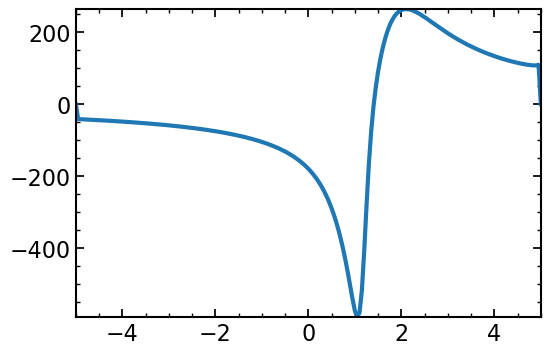

In [54]:
plt.plot(erange, real(TM[:, 0]))

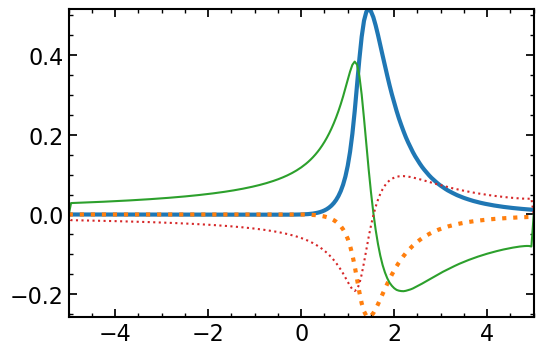

In [49]:
plt.plot(erange, imag(ch1.XS[0])[:, 0])
plt.plot(erange, imag(ch2.XS[0])[:, 0], ls=':')

plt.plot(erange, real(ch1.XS[0])[:, 0], lw=1.5)
plt.plot(erange, real(ch2.XS[0])[:, 0], ls=':', lw=1.5)

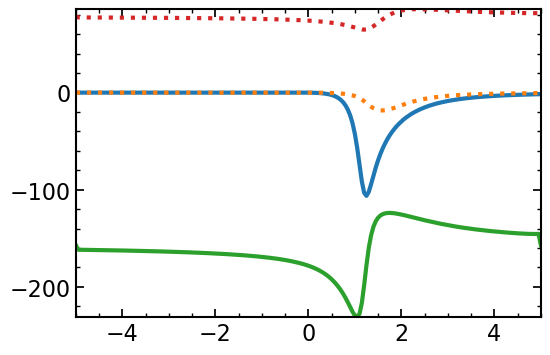

In [50]:
plt.plot(erange, imag(ch1.TM)[:, 0])
plt.plot(erange, imag(ch2.TM)[:, 0], ls=':')

plt.plot(erange, real(ch1.TM)[:, 0])
plt.plot(erange, real(ch2.TM)[:, 0], ls=':')